#### IMPORTING LIBRARIES

In [103]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score, precision_recall_curve, recall_score, accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

# Import:
from imblearn.over_sampling import ADASYN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### DATA PRE-PROCESSING

In [2]:
from google.colab import drive
drive.mount('/content/Credit-Card-Fraud-Detection')

Mounted at /content/Credit-Card-Fraud-Detection


In [3]:
# Reading the train and test dataset
df_train = pd.read_csv("/content/Credit-Card-Fraud-Detection/MyDrive/Credit-Card-Fraud-Detection/fraudTrain.csv")
df_test = pd.read_csv("/content/Credit-Card-Fraud-Detection/MyDrive/Credit-Card-Fraud-Detection/fraudTest.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Examining the Train dataset imported:
df_train.shape

(1296675, 23)

In [5]:
# Examining the Test dataset imported:
df_test.shape

(555719, 23)

In [6]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
# Basic understanding of dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
# Basic understanding of dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

#### EXPLORATORY DATA ANALYSIS AND DATA PREPARATIONS

In [10]:
# Dropping of Unnamed column
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
# Print the dataframe of train / test after drop the coloumns
print(df_train.shape)
print(df_test.shape)

(1296675, 22)
(555719, 22)


In [12]:
# Converting date columns to datetime format in train dataset
df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [13]:
# Convert date column to datetime format in test dataset
df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21


In [14]:
# Dropping fields not necessary for model building
drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']
df_traindata = df_train.drop(drop_cols,axis=1)
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [15]:
drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']
df_testdata = df_test.drop(drop_cols,axis=1)
df_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [16]:
df_traindata.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [17]:
df_testdata.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,38.542798,-90.231380,0.003860
std,156.745941,5.061336,13.721780,3.003909e+05,5.095829,13.733071,0.062008
min,1.000000,20.027100,-165.672300,2.300000e+01,19.027422,-166.671575,0.000000
25%,9.630000,34.668900,-96.798000,7.410000e+02,34.755302,-96.905129,0.000000
50%,47.290000,39.371600,-87.476900,2.408000e+03,39.376593,-87.445204,0.000000
75%,83.010000,41.894800,-80.175200,1.968500e+04,41.954163,-80.264637,0.000000
max,22768.110000,65.689900,-67.950300,2.906700e+06,66.679297,-66.952026,1.000000


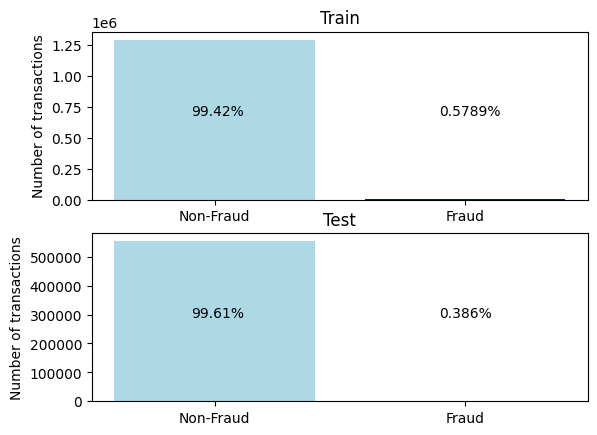

In [18]:
# Checking Class Imbalance
classes_train=df_traindata['is_fraud'].value_counts()
normal_share_train=classes_train[0]/df_traindata['is_fraud'].count()*100
fraud_share_train=classes_train[1]/df_traindata['is_fraud'].count()*100

classes_test=df_testdata['is_fraud'].value_counts()
normal_share_test=classes_test[0]/df_testdata['is_fraud'].count()*100
fraud_share_test=classes_test[1]/df_testdata['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['lightblue','blue'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['lightblue','blue'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [19]:
# Finding the initial full correlation in the dataset:
numeric_cols = df_traindata.select_dtypes(include=[np.number])
cor = numeric_cols.corr()
print(cor)

                 amt       lat      long  city_pop  merch_lat  merch_long  \
amt         1.000000 -0.001926 -0.000187  0.005818  -0.001873   -0.000151   
lat        -0.001926  1.000000 -0.015533 -0.155730   0.993592   -0.015509   
long       -0.000187 -0.015533  1.000000 -0.052715  -0.015452    0.999120   
city_pop    0.005818 -0.155730 -0.052715  1.000000  -0.154781   -0.052687   
merch_lat  -0.001873  0.993592 -0.015452 -0.154781   1.000000   -0.015431   
merch_long -0.000151 -0.015509  0.999120 -0.052687  -0.015431    1.000000   
is_fraud    0.219404  0.001894  0.001721  0.002136   0.001741    0.001721   

            is_fraud  
amt         0.219404  
lat         0.001894  
long        0.001721  
city_pop    0.002136  
merch_lat   0.001741  
merch_long  0.001721  
is_fraud    1.000000  


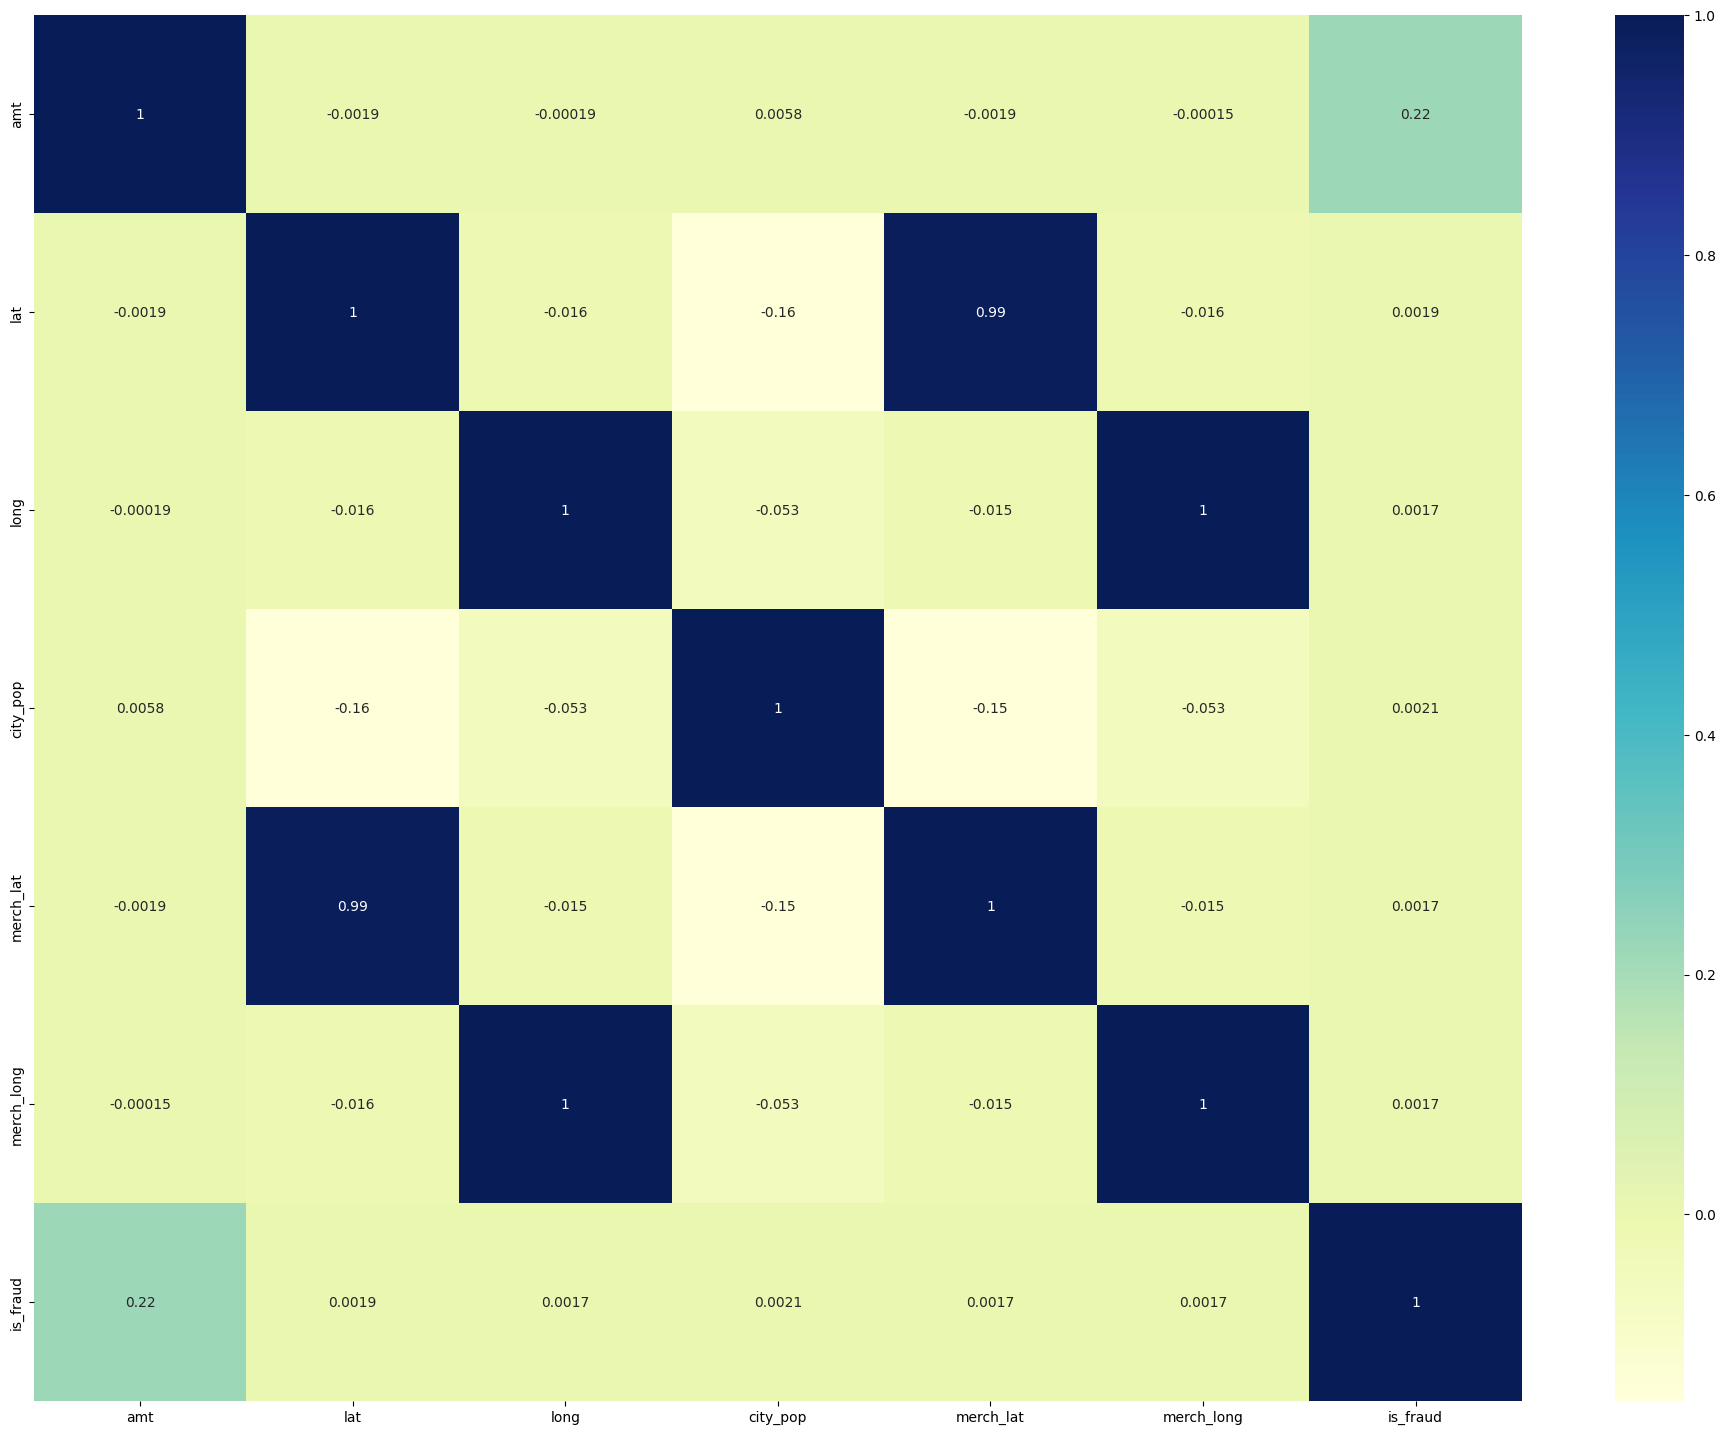

In [20]:
# Plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [21]:
# Calculate age in years by dividing the days by 365.25 (accounting for leap years)
df_traindata['age_at_trans'] = (df_traindata['trans_date'] - df_traindata['dob']) / np.timedelta64(1, 'D') / 365.25
df_traindata['age_at_trans'] = df_traindata['age_at_trans'].apply(np.floor)  # Floor the age to get completed years

# Repeat the same for test data
df_testdata['age_at_trans'] = (df_testdata['trans_date'] - df_testdata['dob']) / np.timedelta64(1, 'D') / 365.25
df_testdata['age_at_trans'] = df_testdata['age_at_trans'].apply(np.floor)

# Now you can view the modified dataframe
df_traindata.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [22]:
# show the test data head
df_testdata.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,52.0
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,30.0
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,49.0
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,32.0
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,64.0


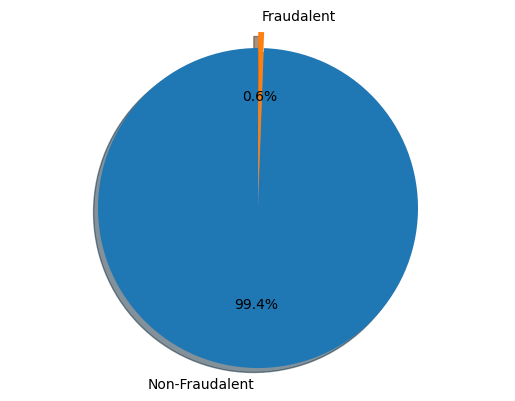

In [23]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df_traindata['is_fraud'].value_counts()
normal_share=classes[0]/df_traindata['is_fraud'].count()*100
fraud_share=classes[1]/df_traindata['is_fraud'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [24]:
print('The percentage without Non-Fradulent prediction is ', round(df_traindata['is_fraud'].value_counts()[0]/len(df_traindata) * 100,2), '% of the dataset')
print('The percentage with Fradulent prediction is ', round(df_traindata['is_fraud'].value_counts()[1]/len(df_traindata) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df_traindata['is_fraud'].value_counts()[1]/df_traindata['is_fraud'].value_counts()[0] * 100,2))

The percentage without Non-Fradulent prediction is  99.42 % of the dataset
The percentage with Fradulent prediction is  0.58 % of the dataset
The ratio of imbalance is 0.58


In [25]:
# Portray the train dataset and analyse
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [26]:
# Portray the test dataset and analyse
df_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [27]:
# To identify the fraud transaction fraud_city
fraud_city = pd.DataFrame(df_traindata.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [28]:
# Groupby States in the city persists in fradulent transaction
fraud_state = pd.DataFrame(df_traindata.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index


Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [29]:
# Groupby Fraudesters related jobs
fraud_job = pd.DataFrame(df_traindata.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [30]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

df_traindata['lat_dist'] = abs(round(df_traindata['merch_lat']-df_traindata['lat'],3))
df_traindata['long_dist'] = abs(round(df_traindata['merch_long']-df_traindata['long'],3))

df_testdata['lat_dist'] = abs(round(df_testdata['merch_lat']-df_testdata['lat'],3))
df_testdata['long_dist'] = abs(round(df_testdata['merch_long']-df_testdata['long'],3))

df_traindata[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [31]:
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [32]:
df_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [33]:
# Impute month column
df_traindata['trans_month'] = pd.DatetimeIndex(df_traindata['trans_date']).month
df_testdata['trans_month'] = pd.DatetimeIndex(df_testdata['trans_date']).month

In [34]:
print(df_traindata[['trans_date_trans_time','trans_month']].head())
print(df_testdata[['trans_date_trans_time','trans_month']].head())

  trans_date_trans_time  trans_month
0   2019-01-01 00:00:18            1
1   2019-01-01 00:00:44            1
2   2019-01-01 00:00:51            1
3   2019-01-01 00:01:16            1
4   2019-01-01 00:03:06            1
  trans_date_trans_time  trans_month
0   2020-06-21 12:14:25            6
1   2020-06-21 12:14:33            6
2   2020-06-21 12:14:53            6
3   2020-06-21 12:15:15            6
4   2020-06-21 12:15:17            6


In [35]:
# Impute transaction time column
df_traindata['trans_time'] = pd.DatetimeIndex(df_traindata['trans_date_trans_time']).time
df_testdata['trans_time'] = pd.DatetimeIndex(df_testdata['trans_date_trans_time']).time

In [36]:
print(df_traindata[['trans_date_trans_time','trans_time']].head())
print(df_testdata[['trans_date_trans_time','trans_time']].head())

  trans_date_trans_time trans_time
0   2019-01-01 00:00:18   00:00:18
1   2019-01-01 00:00:44   00:00:44
2   2019-01-01 00:00:51   00:00:51
3   2019-01-01 00:01:16   00:01:16
4   2019-01-01 00:03:06   00:03:06
  trans_date_trans_time trans_time
0   2020-06-21 12:14:25   12:14:25
1   2020-06-21 12:14:33   12:14:33
2   2020-06-21 12:14:53   12:14:53
3   2020-06-21 12:15:15   12:15:15
4   2020-06-21 12:15:17   12:15:17


In [37]:
#To check the nunique variable in dataframe in train dataset
df_traindata.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
trans_time                 86400
dtype: int64

In [38]:
#To check the nunique variable in dataframe in test dataset
df_testdata.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
lat_dist                   1001
long_dist                  1001
trans_month                   7
trans_time                86092
dtype: int64

In [39]:
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [40]:
#To round off the catergory in train data
round(df_traindata['category'].value_counts()/len(df_traindata.index)*100,2)

gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: category, dtype: float64

In [41]:
#To round off the gender in train data
round(df_traindata['gender'].value_counts()/len(df_traindata.index)*100,2)

F    54.74
M    45.26
Name: gender, dtype: float64

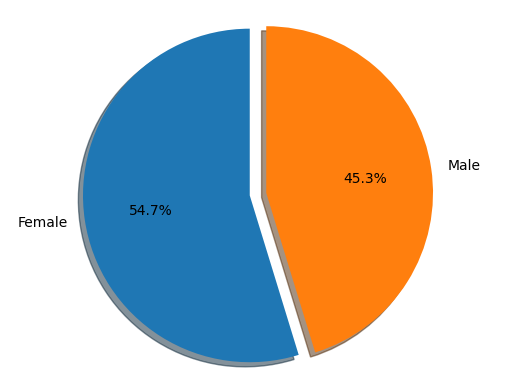

In [42]:
classes_gender=round(df_traindata['gender'].value_counts()/len(df_traindata.index)*100,2)

labels = 'Female', 'Male'
sizes = classes_gender
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [43]:
# To round off the value based on the city
round(df_traindata['city'].value_counts()/len(df_traindata.index)*100,2)

Birmingham     0.43
San Antonio    0.40
Utica          0.39
Phoenix        0.39
Meridian       0.39
               ... 
Vacaville      0.00
Claypool       0.00
Karns City     0.00
Bruce          0.00
Chattanooga    0.00
Name: city, Length: 894, dtype: float64

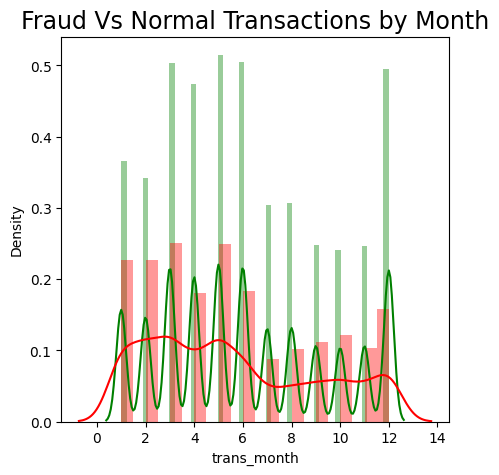

In [44]:
#The fraus Vs normal trasaction by Month
plt.figure(figsize=(5,5))
sns.distplot(df_traindata[df_traindata['is_fraud'] == 0]["trans_month"], color='green')
sns.distplot(df_traindata[df_traindata['is_fraud'] == 1]["trans_month"], color='red')
plt.title('Fraud Vs Normal Transactions by Month', fontsize=17)
plt.show()

In [45]:
# Drop the fields which is not impact to build the model
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','trans_time']

df_traindata1 = df_traindata.drop(drop_cols,axis=1)
df_testdata1 = df_testdata.drop(drop_cols,axis=1)

In [46]:
df_traindata1.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.0,0.254,0.830,1


In [47]:
# Find Percentile
df_traindata1[['amt','city_pop','age_at_trans','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.549541e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739698e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.300000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [48]:
# Impute the dummy variables
df_traindata2 = pd.get_dummies(df_traindata1,columns=['category'],drop_first=True)
df_testdata2 = pd.get_dummies(df_testdata1,columns=['category'],drop_first=True)

In [49]:
# Check the dataframe after impute dummy variables
df_traindata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  object 
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age_at_trans             1296675 non-null  float64
 6   lat_dist                 1296675 non-null  float64
 7   long_dist                1296675 non-null  float64
 8   trans_month              1296675 non-null  int64  
 9   category_food_dining     1296675 non-null  uint8  
 10  category_gas_transport   1296675 non-null  uint8  
 11  category_grocery_net     1296675 non-null  uint8  
 12  category_grocery_pos     1296675 non-null  uint8  
 13  category_health_fitness  1296675 non-null 

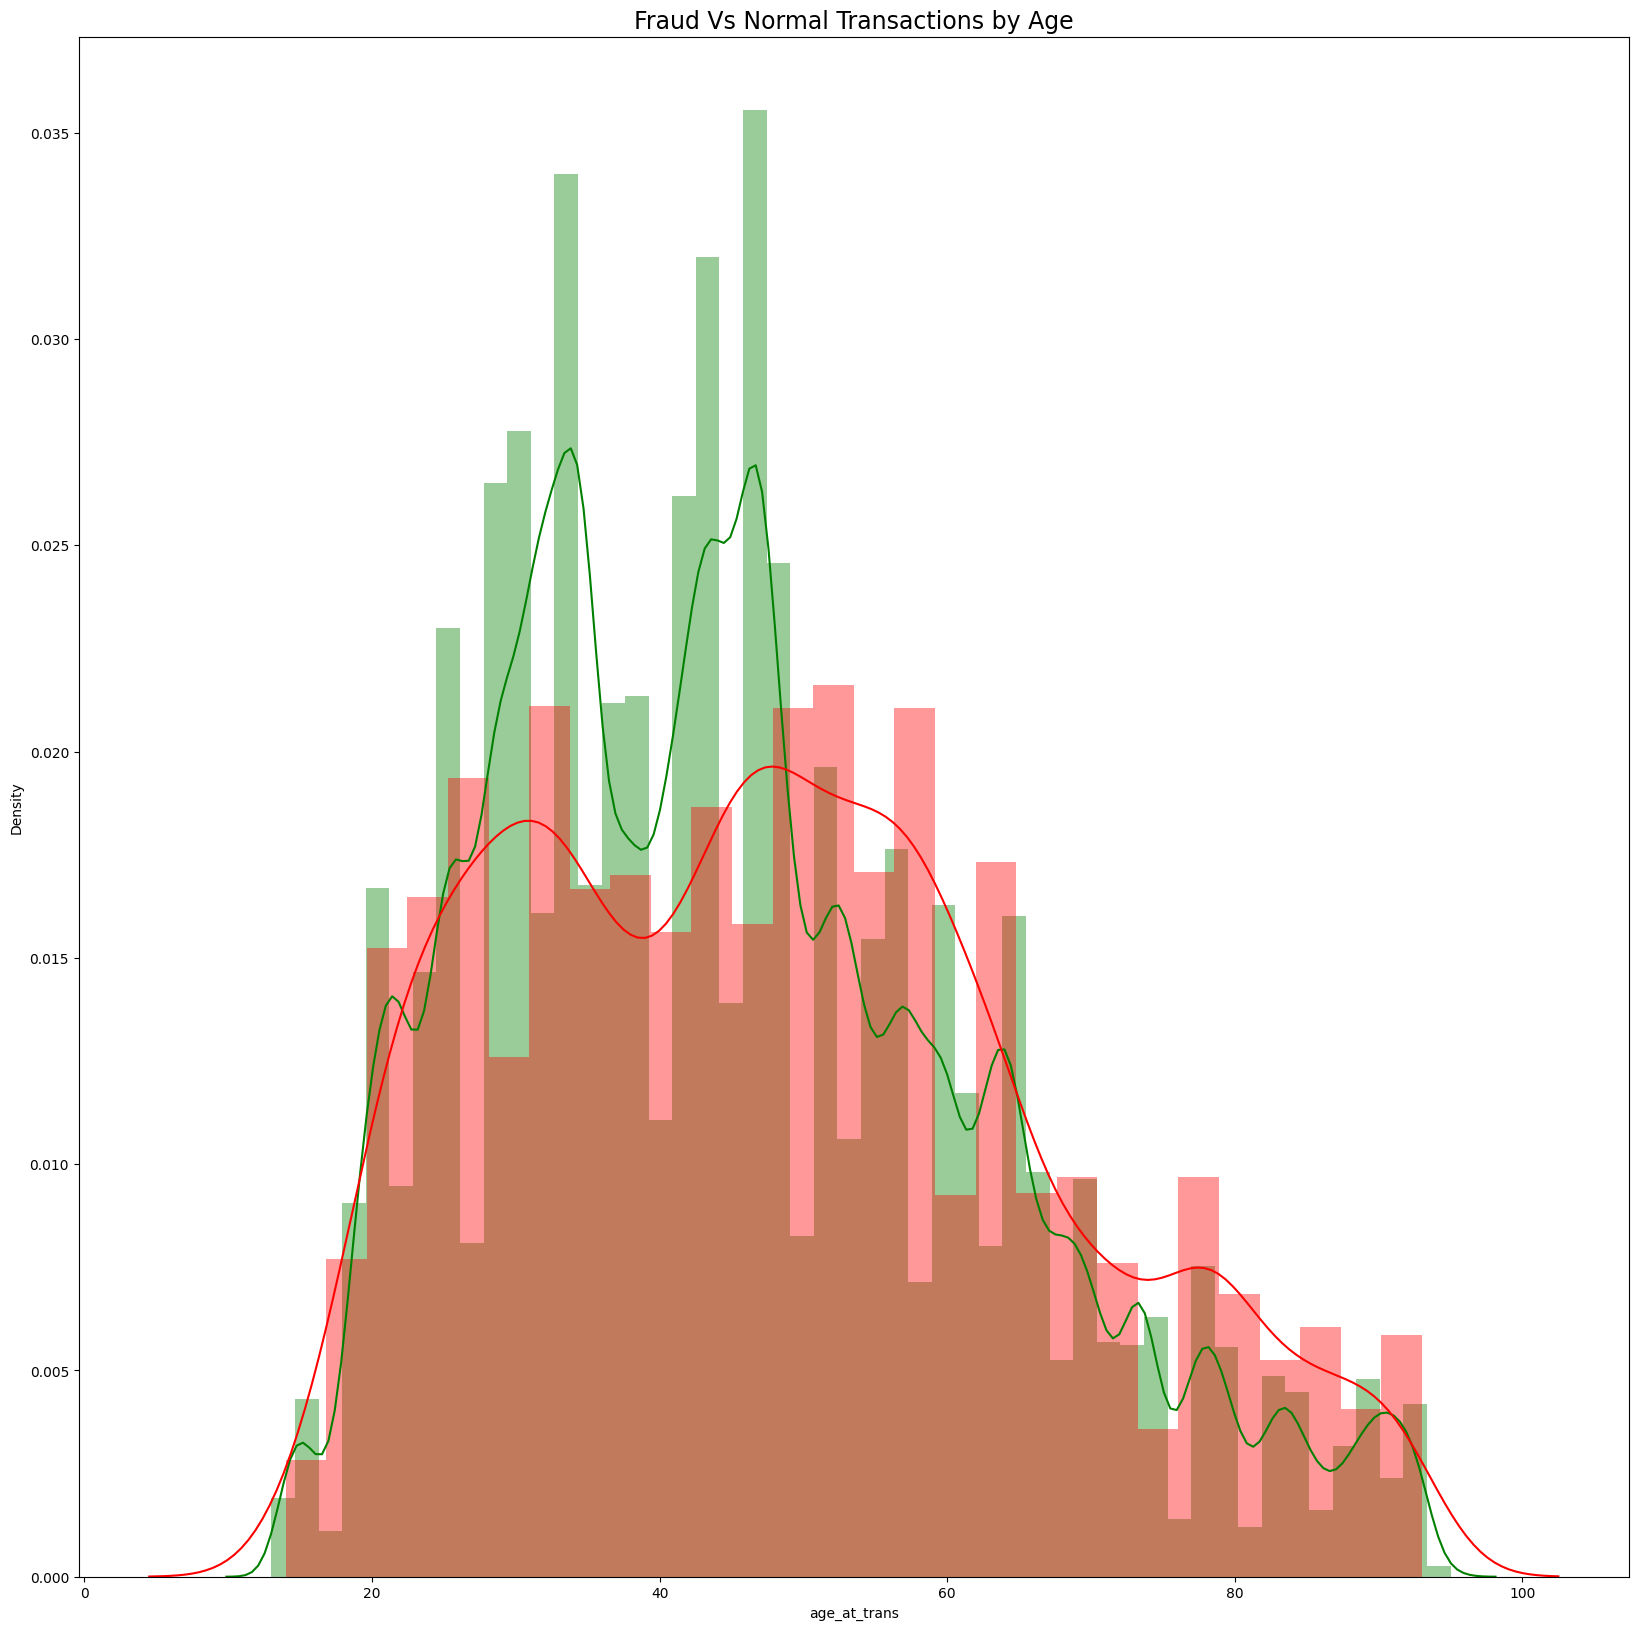

In [50]:
# The fraus Vs normal trasaction by day
plt.figure(figsize=(20,20))
sns.distplot(df_traindata2[df_traindata2['is_fraud'] == 0]["age_at_trans"], color='green')
sns.distplot(df_traindata2[df_traindata2['is_fraud'] == 1]["age_at_trans"], color='red')
plt.title('Fraud Vs Normal Transactions by Age', fontsize=17)
plt.show()

In [51]:
# To clearly the data of frauds and no frauds
df_traindata2_Fraud = df_traindata2[df_traindata2['is_fraud'] == 1]
df_traindata2_Regular = df_traindata2[df_traindata2['is_fraud'] == 0]

# Fraud Transaction Amount Statistics
print(df_traindata2_Fraud["amt"].describe())

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64


In [52]:
# Regular Transaction Amount Statistics
print(df_traindata2_Regular["amt"].describe())

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64


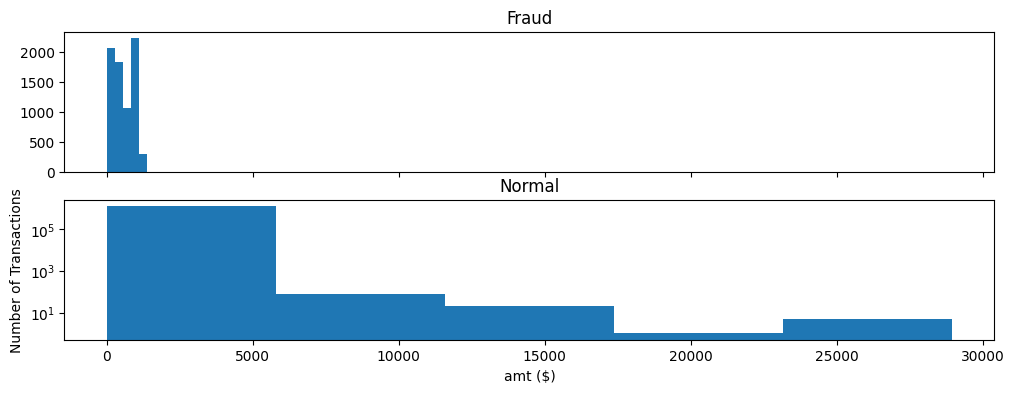

In [53]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 5

ax1.hist(df_traindata2_Fraud.amt[df_traindata2_Fraud.is_fraud == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_traindata2_Regular.amt[df_traindata2_Regular.is_fraud == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('amt ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

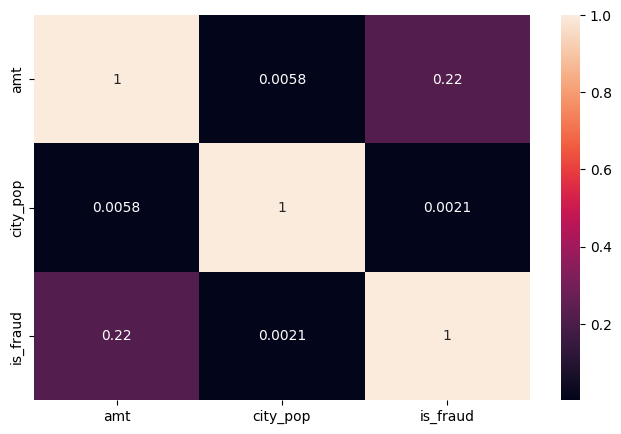

In [54]:
# Plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:
top_feature = cor.index[abs(cor['is_fraud']>0.002)]
plt.subplots(figsize=(8, 5))
top_corr = df_traindata2[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

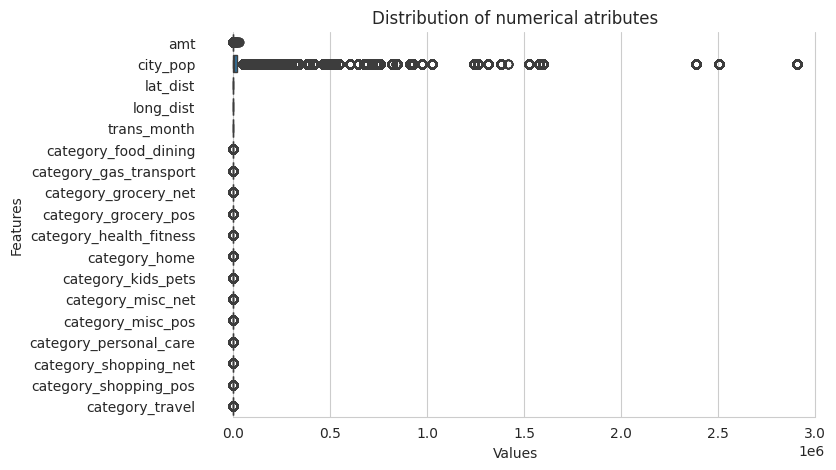

In [55]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df_traindata2.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation :
li_not_plot = ['is_fraud','age_at_trans']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8,5))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df_traindata2[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

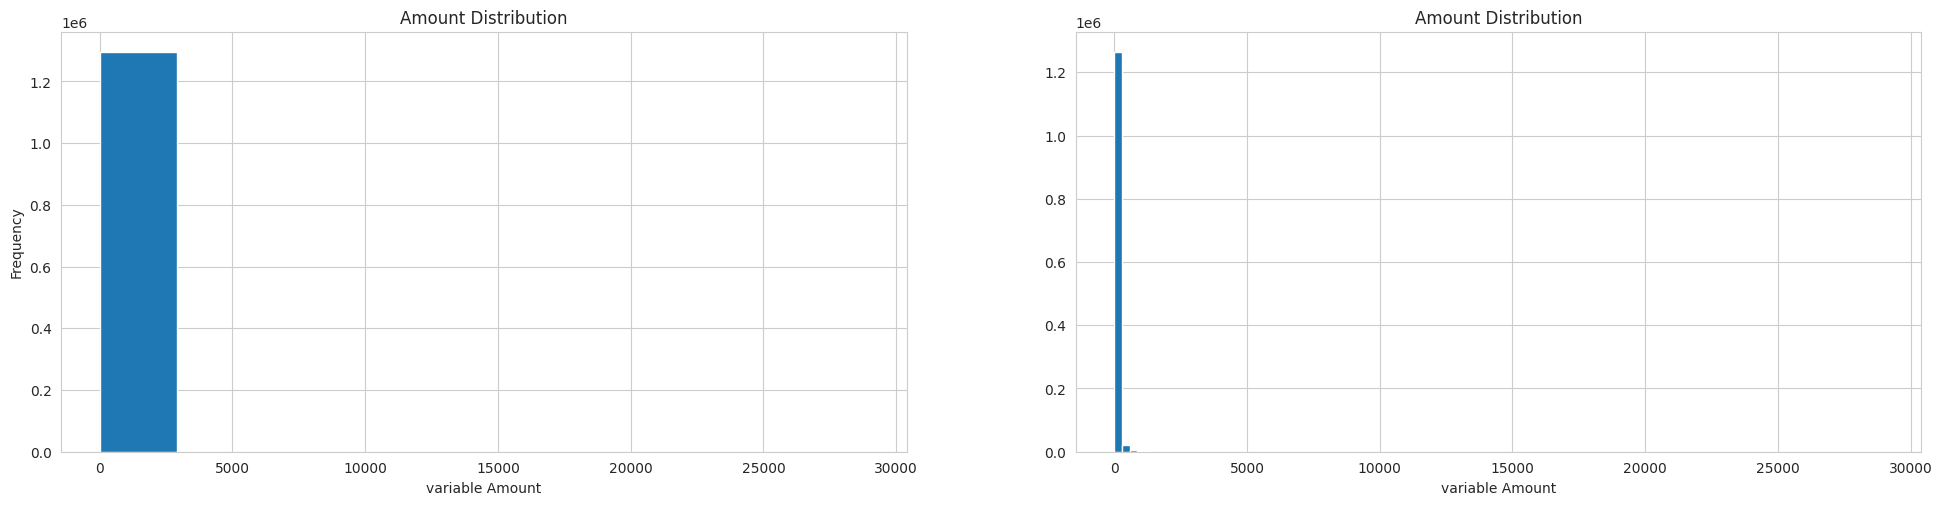

In [56]:
# Understanding the Amount variable as it is not PCA transformed variable :
plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_traindata2['amt'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df_traindata2['amt'],bins=100)
plt.show()

In [57]:
# Dropping column variable State
df_traindata3 = df_traindata2.drop('state',axis=1)
df_testdata3 = df_testdata2.drop('state',axis=1)

In [58]:
# Show the data after drop
df_traindata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  object 
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age_at_trans             1296675 non-null  float64
 5   lat_dist                 1296675 non-null  float64
 6   long_dist                1296675 non-null  float64
 7   trans_month              1296675 non-null  int64  
 8   category_food_dining     1296675 non-null  uint8  
 9   category_gas_transport   1296675 non-null  uint8  
 10  category_grocery_net     1296675 non-null  uint8  
 11  category_grocery_pos     1296675 non-null  uint8  
 12  category_health_fitness  1296675 non-null  uint8  
 13  category_home            1296675 non-null 

In [59]:
# Binary mapping on Gender
df_traindata3['gender'] = df_traindata3['gender'].map({'M': 1, 'F': 0})
df_testdata3['gender'] = df_testdata3['gender'].map({'M': 1, 'F': 0})

df_traindata3.head()

,amt,gender,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,0.068,0.870,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,0.271,0.024,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,0.970,0.108,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,0.804,0.447,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,0.254,0.830,1,0,0,...,0,0,0,0,0,1,0,0,0,0


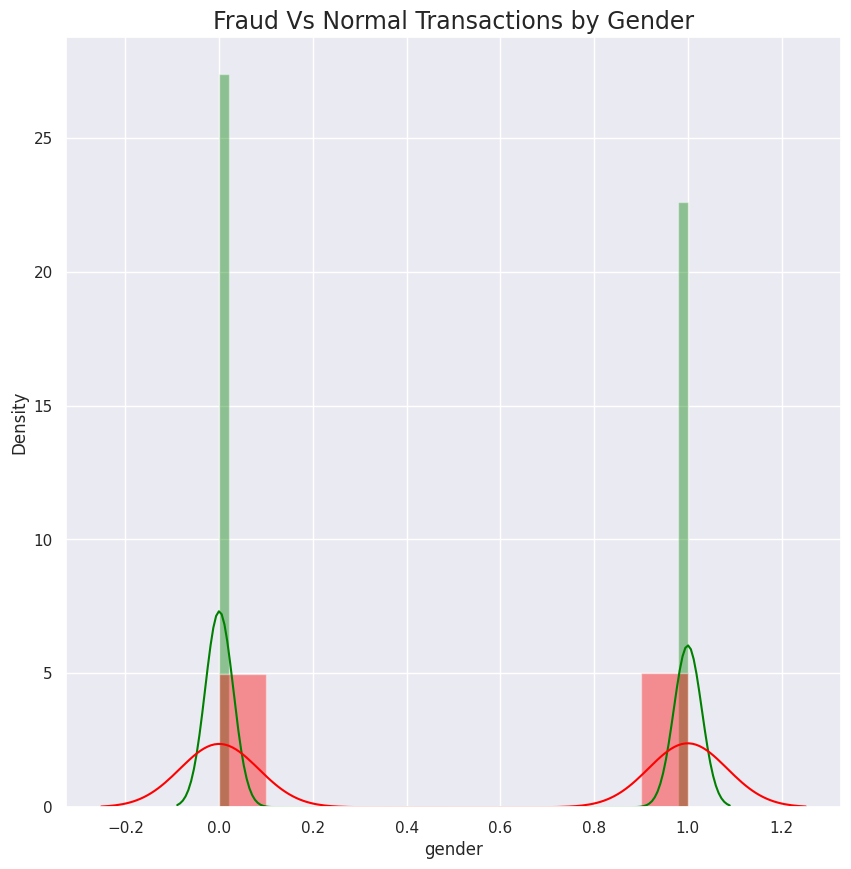

In [60]:
# The fraud Vs normal trasaction by day
plt.figure(figsize=(10,10))
sns.distplot(df_traindata3[df_traindata3['is_fraud'] == 0]["gender"], color='green')
sns.distplot(df_traindata3[df_traindata3['is_fraud'] == 1]["gender"], color='red')
plt.title('Fraud Vs Normal Transactions by Gender', fontsize=17)
plt.show()

#### MODEL BUILDING

In [61]:
# Splitting train and test dataset into X and y
X_train = df_traindata3.drop(['is_fraud'],axis=1)
y_train = df_traindata3['is_fraud']

X_test = df_testdata3.drop(['is_fraud'],axis=1)
y_test = df_testdata3['is_fraud']

In [62]:
# Using ADASYN to oversample
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1288749)]


#### RANDOM FOREST

In [76]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=10, min_samples_leaf=200, random_state=100, oob_score=True)

In [77]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=200,
                       n_estimators=10, oob_score=True, random_state=100)

In [78]:
rf.oob_score_

0.849108466599791

In [79]:
# Execute the prediction
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
print("Classification Report for Train Daata : ")
print(classification_report(y_train_res, y_train_pred))

Classification Report for Train Daata : 
              precision    recall  f1-score   support

           0       0.78      0.98      0.87   1289169
           1       0.97      0.72      0.83   1288749

    accuracy                           0.85   2577918
   macro avg       0.87      0.85      0.85   2577918
weighted avg       0.87      0.85      0.85   2577918



In [81]:
X_test_res, y_test_res = ADASYN().fit_resample(X_test, y_test)
y_test_pred = rf.predict(X_test_res)

print("Classification Report for Test Daata : ")
print(classification_report(y_test_res, y_test_pred))

Classification Report for Test Daata : 
              precision    recall  f1-score   support

           0       0.75      0.98      0.85    553574
           1       0.97      0.68      0.80    553363

    accuracy                           0.83   1106937
   macro avg       0.86      0.83      0.83   1106937
weighted avg       0.86      0.83      0.83   1106937



Text(0.5, 1.0, 'Confusion matrix - Random Forest Classifier')

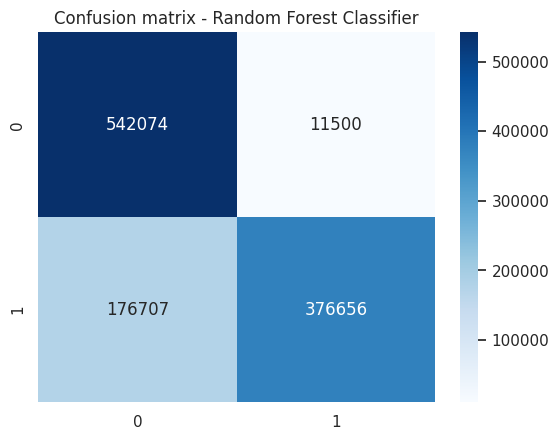

In [82]:
# Compute confusion matrix
confusionMatrix = confusion_matrix(y_test_res, y_test_pred, labels=rf.classes_)

# Display the confusion matrix
sns.heatmap(confusionMatrix, annot = True, fmt ="d", cmap='Blues');
plt.title("Confusion matrix - Random Forest Classifier")

### COST BENEFIT ANALYSIS

In [126]:
# Subset of df_train
df_train_merge = df_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [127]:
# Creating dataframe of y_train_pred
df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [128]:
# Merging the two dataframes
df_train_final = pd.concat([df_train_merge, df_train_pred],axis=1)
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0


In [129]:
# Renaming column
df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0


In [130]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0.0    1289169
1.0       7506
Name: is_fraud, dtype: int64

In [131]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1620143
1     957775
Name: is_fraud_pred, dtype: int64

In [132]:
# Subset of df_test
df_test_merge = df_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_merge.head()


,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [133]:
# Creating dataframe of y_test_pred
df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [134]:
 # Merging the two dataframes
df_test_final = pd.concat([df_test_merge, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0.0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0.0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0.0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0.0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0.0,0


In [135]:
# Renaming column
df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0.0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0.0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0.0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0.0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0.0,0


In [136]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0.0    553574
1.0      2145
Name: is_fraud, dtype: int64

In [137]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    718781
1    388156
Name: is_fraud_pred, dtype: int64

In [138]:
# Merging train and test dataset for cost benefit analysis
df_merge_final = pd.concat([df_train_final, df_test_final],axis=0)
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0


In [139]:
# Creating month and year columns
df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0,1.0,2019.0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0,1.0,2019.0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0,1.0,2019.0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0,1.0,2019.0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0,1.0,2019.0


In [140]:
# Group by variable creation
g = df_merge_final.groupby(["year","month"])

In [141]:
# Number of transactions per month
g.trans_num.count()

year    month
2019.0  1.0       52525
        2.0       49866
        3.0       70939
        4.0       68078
        5.0       72532
        6.0       86064
        7.0       86596
        8.0       87359
        9.0       70652
        10.0      68758
        11.0      70421
        12.0     141060
2020.0  1.0       52202
        2.0       47791
        3.0       72850
        4.0       66892
        5.0       74343
        6.0       87805
        7.0       85848
        8.0       88759
        9.0       69533
        10.0      69348
        11.0      72635
        12.0     139538
Name: trans_num, dtype: int64

In [142]:
# Average number of transactions per month
print("Average number of transactions per month = ", df_merge_final.trans_num.count()/24)


Average number of transactions per month =  77183.08333333333


In [143]:
# Average Number of fraudulent transactions per month
print("Average Number of fraudulent transactions per month = ", df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24)

Average Number of fraudulent transactions per month =  402.125


In [144]:
# Average amount per fraud transaction
print("Average amount per fraud transaction = ", df_merge_final[df_merge_final['is_fraud']==1].amt.mean())

Average amount per fraud transaction =  530.661412288882


In [145]:
# Average number of transactions per month detected as fraud by the model
print("Average number of transactions per month detected as fraud by the model = ", df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24)

Average number of transactions per month detected as fraud by the model =  2011.7083333333333


In [147]:
# Average number of transactions per month that are fraudulent but are not detected by the model
Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
print("Average number of transactions per month that are fraudulent but are not detected by the model = ", Undetected_frauds.trans_num.count()/24)

Average number of transactions per month that are fraudulent but are not detected by the model =  61.333333333333336
